In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import random
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Dataset\df.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,sum,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,4,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15


In [3]:
df.shape

(4920, 135)

,missing_value,%
itching,0,0.0
skin_rash,0,0.0
nodal_skin_eruptions,0,0.0
continuous_sneezing,0,0.0
shivering,0,0.0
...,...,...
red_sore_around_nose,0,0.0
yellow_crust_ooze,0,0.0
prognosis,0,0.0
sum,0,0.0


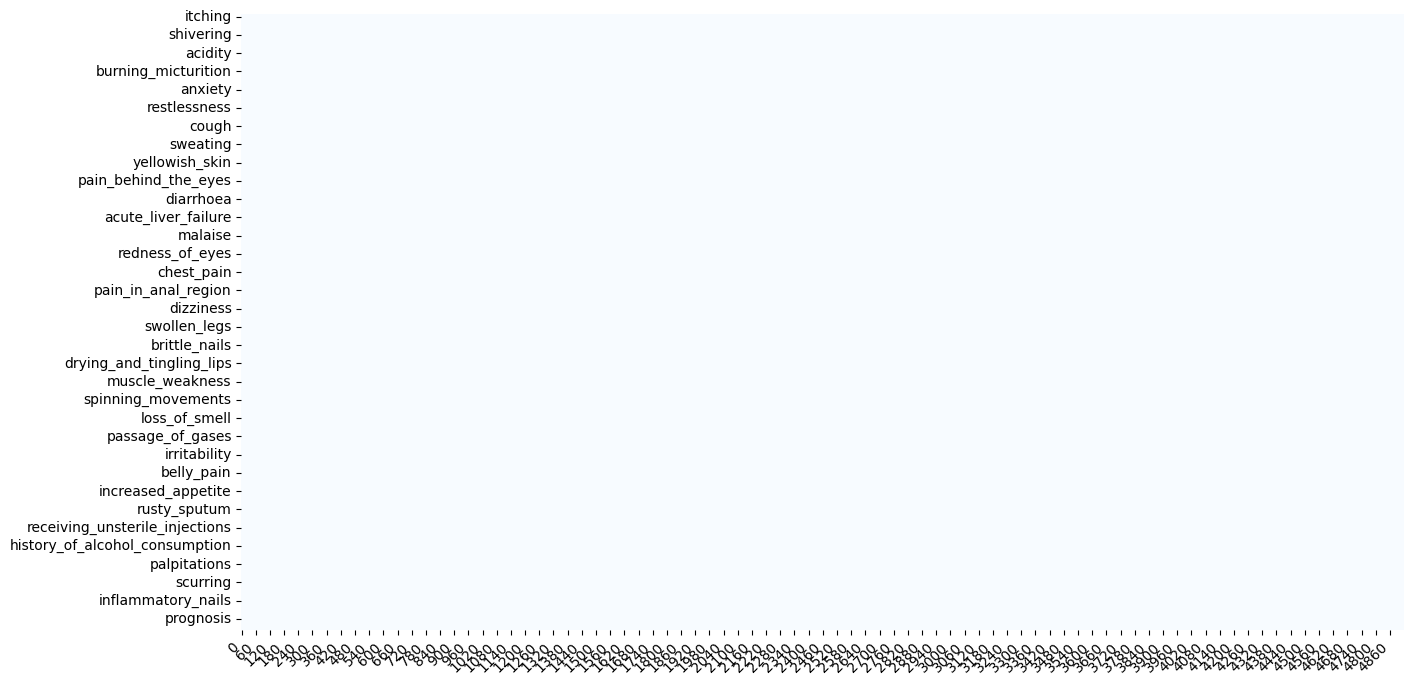

In [6]:
# Plot Missing Value
# !pip install jcopml
from jcopml.plot import plot_missing_value
plot_missing_value(df, return_df = True)

In [7]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,sum,class_prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,7.448780,20.000000
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,3.592166,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,40.000000


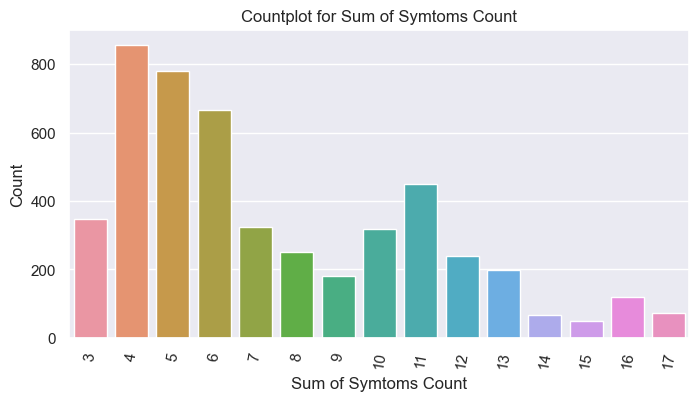

In [13]:
#df['sum'].value_counts()
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(data=df, x="sum") 
plt.title('Countplot for Sum of Symtoms Count')
plt.xlabel('Sum of Symtoms Count')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

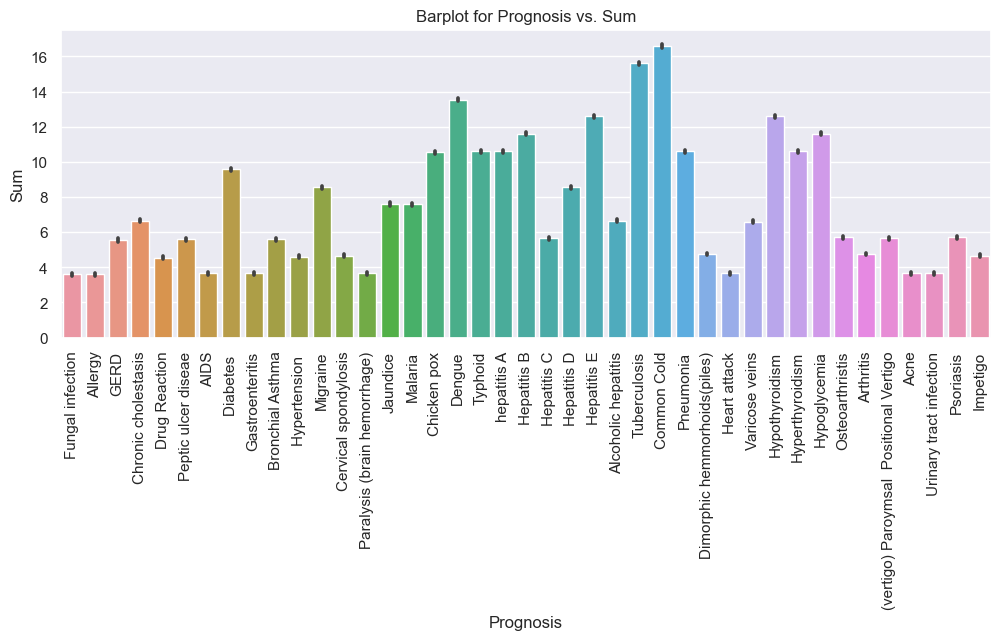

In [20]:
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(data=df, x="prognosis", y="sum")
plt.title('Barplot for Prognosis vs. Sum')
plt.xlabel('Prognosis')
plt.ylabel('Sum')
plt.xticks(rotation=90)
plt.show()